<a href="https://colab.research.google.com/github/smhasandanish/codsoft-datasci-internship/blob/main/codsoft_taskno_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving car_purchasing.xlsx to car_purchasing (1).xlsx


In [ ]:
print(data.columns)


Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load your sales data (replace 'data.csv' with your data file)
data = pd.read_excel('car_purchasing.xlsx')

# Drop unnecessary columns (if any)
data.drop(['customer name', 'customer e-mail'], axis=1, inplace=True)

# Handle missing values (if any)
data.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = data.drop('car purchase amount', axis=1)  # Features
y = data['car purchase amount']  # Target variable

# Convert categorical variables (like 'gender' and 'country') to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender', 'country'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose a machine learning model (Linear Regression) and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Make a sales prediction for a new set of features
new_features = {
    'age': 35,
    'annual Salary': 75000,
    'credit card debt': 2000,
    'net worth': 500000,
    'gender': 'Male',  # Example values for 'gender' and 'country'
    'country': 'Canada'
}

# ...






Mean Absolute Error: 16435919157494.91


In [ ]:
# Manually create a DataFrame with all possible columns
new_data_columns = list(X.columns)  # Get the list of all possible columns from training data
new_data_values = [new_features.get(col, 0) for col in new_data_columns]  # Use 0 for missing columns

# Create a DataFrame with a single row (your new data point)
X_new = pd.DataFrame([new_data_values], columns=new_data_columns)

# Standardize the new_data using the same scaler object
X_new_scaled = scaler.transform(X_new)

# Predict car purchase amount for X_new_scaled
predicted_sales = model.predict(X_new_scaled)
print(f'Predicted Car Purchase Amount: {predicted_sales[0]}')


Predicted Car Purchase Amount: 43974.17401123047


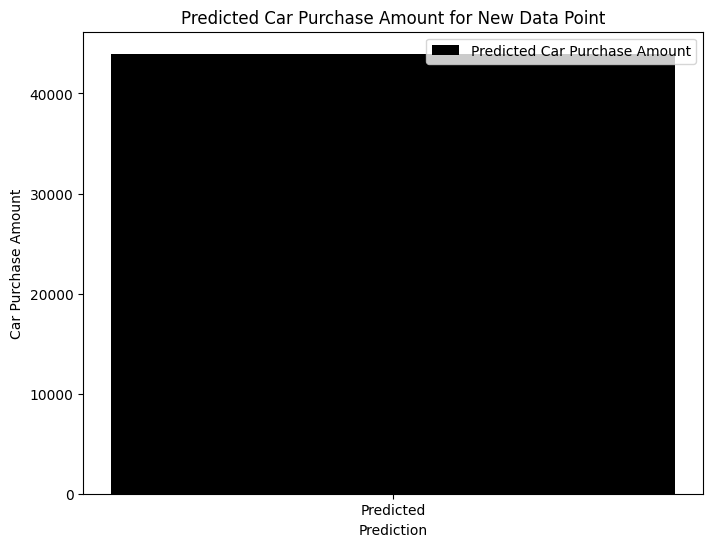

In [ ]:
import matplotlib.pyplot as plt

# Predict car purchase amount for X_new_scaled
predicted_sales = model.predict(X_new_scaled)

# Plot the predicted car purchase amount
plt.figure(figsize=(8, 6))
plt.bar(['Predicted'], [predicted_sales[0]], label='Predicted Car Purchase Amount', color='black')
plt.xlabel('Prediction')
plt.ylabel('Car Purchase Amount')
plt.title('Predicted Car Purchase Amount for New Data Point')
plt.legend()
plt.show()


Predicted Car Purchase Amount for John Doe: 22950.86505126953


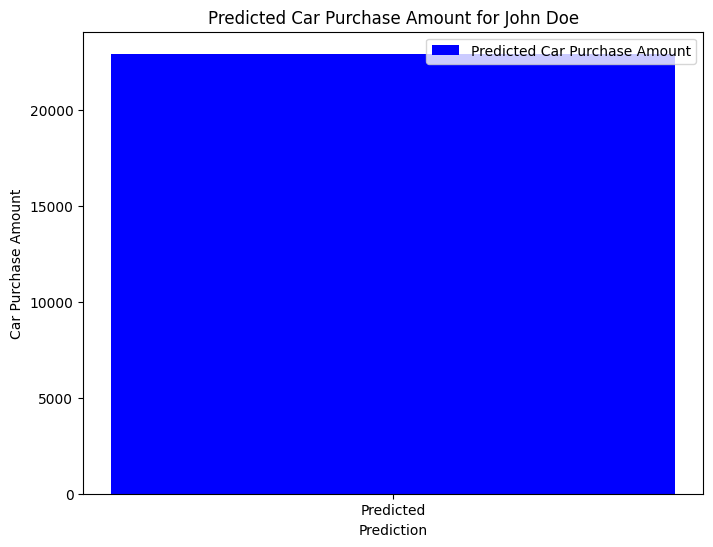

In [ ]:
# Sample user data
sample_user_data = {
    'customer name': 'John Doe',
    'customer e-mail': 'john@example.com',
    'country': 'Canada',
    'gender': 'Male',
    'age': 60,
    'annual Salary': 200,
    'credit card debt': 2000,
    'net worth': 500000,
    'car purchase amount': 0  # Placeholder value, as we want to predict this
}

# Manually create a DataFrame with all possible columns
new_data_columns = list(X.columns)  # Get the list of all possible columns from training data
new_data_values = [sample_user_data.get(col, 0) for col in new_data_columns]  # Use 0 for missing columns

# Create a DataFrame with a single row (sample user data)
X_new = pd.DataFrame([new_data_values], columns=new_data_columns)

# Standardize the new_data using the same scaler object
X_new_scaled = scaler.transform(X_new)

# Predict car purchase amount for X_new_scaled
predicted_sales = model.predict(X_new_scaled)
predicted_amount = predicted_sales[0]

# Print the predicted car purchase amount
print(f'Predicted Car Purchase Amount for {sample_user_data["customer name"]}: {predicted_amount}')

# Plot the predicted car purchase amount
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Predicted'], [predicted_amount], label='Predicted Car Purchase Amount', color='blue')
plt.xlabel('Prediction')
plt.ylabel('Car Purchase Amount')
plt.title(f'Predicted Car Purchase Amount for {sample_user_data["customer name"]}')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your sales data (replace 'data.csv' with your data file)
data = pd.read_excel('car_purchasing.xlsx')

# Drop unnecessary columns (if any)
data.drop(['customer name', 'customer e-mail', 'country', 'gender'], axis=1, inplace=True)

# Handle missing values (if any)
data.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = data.drop('car purchase amount', axis=1)  # Features
y = data['car purchase amount']  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Function to predict car purchase amount and display results
def predict_car_purchase():
    # Get user input for sample data
    sample_user_data = {}
    for col in X.columns:
        sample_user_data[col] = float(input(f'Enter {col}: '))

    # Manually create a DataFrame with user input
    new_data_columns = list(X.columns)
    new_data_values = [sample_user_data.get(col, 0) for col in new_data_columns]
    X_new = pd.DataFrame([new_data_values], columns=new_data_columns)

    # Standardize the new_data using the same scaler object
    X_new_scaled = scaler.transform(X_new)

    # Predict car purchase amount for X_new_scaled
    predicted_sales = model.predict(X_new_scaled)
    predicted_amount = predicted_sales[0]

    # Print the predicted car purchase amount
    print(f'Predicted Car Purchase Amount: {predicted_amount}')

# Predict car purchase amount for user-entered sample data
predict_car_purchase()


Enter age: 30
Enter annual Salary: 200000
Enter credit card debt: 2000
Enter net worth: 30000000
Predicted Car Purchase Amount: 965068.9380438661
